In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

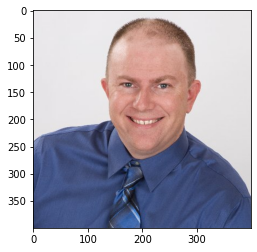

In [19]:
img = cv2.imread("viola.jpg")
plt.imshow(img[:,:,::-1])

In [20]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [21]:
classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cv2.data.haarcascades

'c:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\cv2\\data\\'

In [22]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

In [23]:
faces = classifier.detectMultiScale(gray, scaleFactor = 1.5, minNeighbors = 6, minSize = (50, 50))

In [24]:
print(len(faces))

1


In [25]:
image = cv2.imread('viola.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
while 1:
    faces = face_cascade.detectMultiScale(gray_image,scaleFactor=1.1, minNeighbors=5, minSize=(100,100))
    for x,y,w,h in faces:
        cv2.rectangle(image, (x,y), (x+w, y+h), (0,0,255),5)
        cv2.putText(image,'Face',(x+30,y+h+40),cv2.FONT_HERSHEY_SIMPLEX,1.5,(0,0,255),3)
        face = gray_image[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(face,scaleFactor=1.35,minNeighbors=5, minSize=(20,20))
        for x1,y1,w1,h1 in eyes:
            c_x = x+x1+(w1//2)
            c_y = y+y1+(h1//2)
            cv2.circle(image, (c_x, c_y),15,(0,255,0), 2)
            cv2.putText(image,'eye',(c_x-10,c_y+35),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,255),2)
        smile = smile_cascade.detectMultiScale(face, scaleFactor=1.2, minNeighbors=8, minSize=(45,45))
        for x2, y2, w2, h2 in smile:
            cv2.rectangle(image,(x2+x, y2+y), (x2+w2+x, y2+h2+y), (0,0,255), 2)
            cv2.putText(image,'smile',(x+x2+20,y+y2+h2+25),cv2.FONT_HERSHEY_SIMPLEX,0.9,(0,0,255),2)

    cv2.imshow('image',image)
    if cv2.waitKey(0) == ord('b'):
        image[y:y+h, x:x+w] = cv2.blur(image[y:y+h, x:x+w],(9,9),borderType=cv2.BORDER_ISOLATED)
    elif cv2.waitKey(0) == ord('i'):
        image = cv2.imread('viola.jpg')
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    elif cv2.waitKey(0) == ord('q'):
        break

cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'
